<a href="https://colab.research.google.com/github/damianmtz98/Datos_Masivos_MCD/blob/main/ProyectoFinalAvanceII_DatosMasivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance Proyecto Final** / Prediccion de tipo de cambio del Dólar (USD)

 Nuestro objetivo principal es crear un modelo que nos ayude a predecir el tipo de cambio del dólar (USD), teniendo en cuenta diferentes índices, valor de otras monedas respecto al dólar, tambien el precio del oro y petróleo.
 El tipo de cambio afecta en mucho la economía mundial y el dólar es una moneda dominante, este proyecto nos ayudaría para tomar medidas o decisiones economicas para evitar que nos afecte y en el mejor de los casos obtener un beneficio.

 Las variables a considerar son las siguientes:



*   USD/MXN: Precio dólar a peso mexicano.
*   USD/EUR: Precio dólar a euro.
*   USD/JPY: Precio dólar a yen.
*   OIL: Precio del petróleo.
*   GOLD: Precio oro.
*   S&P500: Índice bursátil.
*   DowJones: Índice bursátil.
*   TasaDesempleoUSA: Tasa de desempleo en USA.

Todos estos datos son sacados de Yahoo Finance, y son de los últimos 5 años.












A continuación realizaremos un ánalisis exploratorio de los datos.

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
df = pd.read_csv("usdmxn.csv")
df.head(15)

,Date,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,16/07/2018,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,23/07/2018,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,30/07/2018,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,06/08/2018,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,13/08/2018,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9
5,20/08/2018,19.01,1.16,111.37,71.78,1958.4,4409.59,34299.12,3.9
6,27/08/2018,19.07,1.16,111.04,70.17,1962.2,4298.86,33876.78,3.9
7,03/09/2018,19.31,1.16,111.00,71.74,1952.4,4282.37,33762.76,3.7
8,10/09/2018,18.83,1.16,112.01,72.67,1944.1,4205.45,33093.34,3.7
9,17/09/2018,18.81,1.18,112.56,71.55,1978.7,4191.98,33426.63,3.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USD/MXN           263 non-null    float64
 1   USD/EUR           263 non-null    float64
 2   USD/JPY           263 non-null    float64
 3   Oil               262 non-null    float64
 4   Gold              263 non-null    float64
 5   S&P500            263 non-null    float64
 6   DowJones          263 non-null    float64
 7   TasaDesempleoUSA  263 non-null    float64
dtypes: float64(8)
memory usage: 16.6 KB


In [ ]:
df.shape

#Observamos que tenemos 263 datos y 9 columnas.

(263, 9)

In [ ]:

df = df.drop(columns=['Date'])
df.head()

#Quitamos la columna 'Date' porque no se tomara en cuenta.

,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USD/MXN           263 non-null    float64
 1   USD/EUR           263 non-null    float64
 2   USD/JPY           263 non-null    float64
 3   Oil               262 non-null    float64
 4   Gold              263 non-null    float64
 5   S&P500            263 non-null    float64
 6   DowJones          263 non-null    float64
 7   TasaDesempleoUSA  263 non-null    float64
dtypes: float64(8)
memory usage: 16.6 KB


In [ ]:
df.shape

#Confirmamos que ya no se tome en cuenta la columna 'Date'

(263, 8)

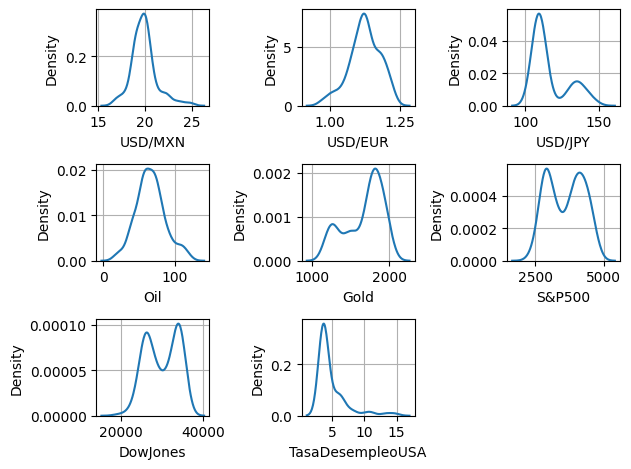

In [ ]:
# Utilzamos la KDE, para poder visualizar que distribucíon siguen nuestras variables.

r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

A simple vista podemos observar que nuestras variables USD/MXN, USD/EUR y OIL siguen una distribución normal, la variable TasaDesempleoUSA pareciera que también pude seguir la misma distribución.

Respecto a nuestras variables restantes siguen una distribución binomial en este caso son	USD/JPY, Gold,	S&P500,	DowJones.

Tambien notamos que:

*   USD/MXN tiene la mayor densidad entre los 20 pesos.
*   En la tasa de desempleo en USA su mayor densidad ronda entre el 3 y 4 por ciento.
*   USD/JPY tiene una mayor densidad en el precio 110 y otra muy baja que esta entre 130 y 140.




In [ ]:
#Realizamos la matriz de correlación para saber como se relacionan las variables entre sí.

matriz_correlacion = df.corr()

In [ ]:
matriz_correlacion

,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
USD/MXN,1.000000,0.115111,-0.399975,-0.130282,0.320374,0.330666,0.313462,0.724969
USD/EUR,0.115111,1.000000,-0.765115,-0.187318,0.665446,0.349425,0.280017,0.309904
USD/JPY,-0.399975,-0.765115,1.000000,-0.217841,-0.880792,-0.736590,-0.665180,-0.409217
Oil,-0.130282,-0.187318,-0.217841,1.000000,0.251647,0.618258,0.657634,-0.076170
Gold,0.320374,0.665446,-0.880792,0.251647,1.000000,0.774284,0.702287,0.298183
S&P500,0.330666,0.349425,-0.736590,0.618258,0.774284,1.000000,0.979900,0.390140
DowJones,0.313462,0.280017,-0.665180,0.657634,0.702287,0.979900,1.000000,0.368149
TasaDesempleoUSA,0.724969,0.309904,-0.409217,-0.076170,0.298183,0.390140,0.368149,1.000000


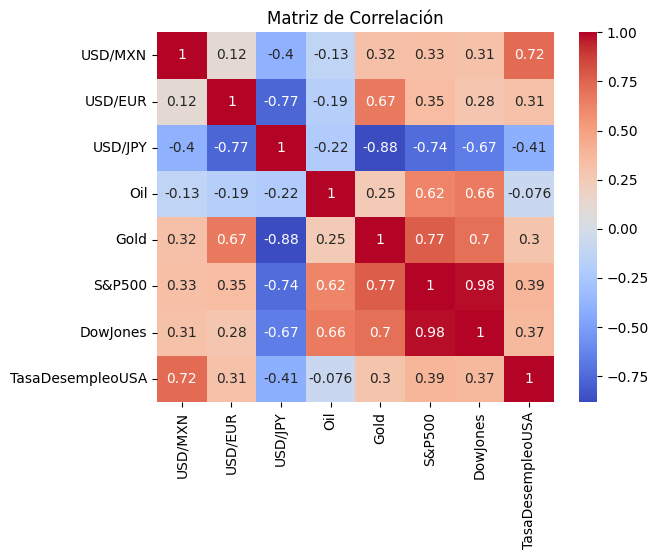

In [ ]:
#Mostramos el mapa de calor de la matriz de correlación.

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


* La tasa de desempleo en USA y el precio del USD/MXN tienen una correlacion positiva y esto significa que si una aumenta la otra igual. También estas dos tienen una correlación positiva con el oro y los índices S&P500 y Dow Jones aunque esta relación es debil y se puede decir que se pueden influenciar un poco entre sí.

* USD/JPY tiene una relación negativa con todas las demas variables, esto quiere decir que si los demas suben de precio, USD/JPY baja.

* Los índices S&P500 y Dow Jones siguen una correlación positiva con todas las demás variables excepto USD/JPY, el USD/MXN y USD/EUR siguen una relacion positiva pero debil con estos dos índices en comparación con el petróleo y el oro que tienen una correlación positiva con mas del 0.60. Concluyendo este punto podemos decir que estos índices van de la mano con los precios de nuestras variables.


In [ ]:
x = df.drop(columns=['USD/MXN'])
y = df['USD/MXN']

Al separar los datos en características (x) y variable objetivo (y), estamos preparando los datos para utilizar diferentes modelos de aprendizaje automático. Cada modelo utilizará las características (x) para hacer sus predicciones, y luego comparará esas predicciones con la variable objetivo (y) para evaluar su capacidad de predecir con precisión el resultado deseado. De esta manera, podemos determinar cuál modelo es el más adecuado para nuestras necesidades de predicción.

In [ ]:
#Entrenamiento y prueba
x.entreno, x.prueba, y.entreno, y.prueba = train_test_split(X, y, test_size=0.2, shuffle=True)

<ipython-input-109-3de6aa5abc2c>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.entreno, x.prueba, y.entreno, y.prueba = train_test_split(X, y, test_size=0.2, shuffle=True)


Dividir los datos en entrenamiento y prueba significa separar una parte de los datos para entrenar al modelo y otra parte para probar su rendimiento. Es una forma de medir qué tan bien el modelo generaliza en datos no vistos previamente. Esto ayuda a evitar que el modelo se ajuste demasiado a los datos de entrenamiento y mejora su capacidad de hacer predicciones precisas en situaciones nuevas.

In [ ]:
#Se están eliminando las filas con valores faltantes
x.entreno.dropna(inplace=True)
y.entreno = y.entreno[x.entreno.index]

In [ ]:
# Creación y entrenamiento de los modelos
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'HistGradientBoosting': HistGradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

results = {}
for name, model in models.items():
    model.fit(x.entreno, y.entreno)
    y.predi = model.predict(x.prueba)
    mse = mean_squared_error(y.prueba, y.predi)
    r2 = r2_score(y.prueba, y.predi)
    results[name] = {'MSE': mse, 'R2 Score': r2}

#Imprimir resultados
print("Resultados:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  MSE: {result['MSE']}")
    print(f"  R2 Score: {result['R2 Score']}")
    print()

# Mejor modelo
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"Mejor modelo: {best_model}")

Resultados:
Gradient Boosting:
  MSE: 0.2675600417278751
  R2 Score: 0.8879196321264854

HistGradientBoosting:
  MSE: 0.5291092239267774
  R2 Score: 0.7783572013219464

XGBoost:
  MSE: 0.49486025276537654
  R2 Score: 0.7927040270372875

Random Forest:
  MSE: 0.2864137969811315
  R2 Score: 0.8800218316517368

Linear Regression:
  MSE: 0.9908470698286794
  R2 Score: 0.5849361385369284

Support Vector Regression:
  MSE: 2.7610329197510874
  R2 Score: -0.1565911836391598

Neural Network:
  MSE: 301.9512097870799
  R2 Score: -125.48675958575645

Mejor modelo: Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Como se puede observar, el modelo Gradient Boosting tiene el menor error cuadrático medio (MSE) y el mayor coeficiente de determinación (R2 Score) lo que indica que es el modelo más preciso en la predicción del tipo de cambio USD/MXN en comparación con los demás modelos probados, le siguen HistGradientBoosting y Random Forest.   Por otro lado, el modelo de Red Neuronal obtuvo los resultados menos favorables en este caso.

In [ ]:
predictions = pd.DataFrame({'Real': y.prueba})

# Hacer las predicciones para cada modelo y agregarlas a la tabla
for name, model in models.items():
    model.fit(x.entreno, y.entreno)
    y.predi = model.predict(x.prueba)
    predictions[name] = y.predi

print(predictions)

      Real  Gradient Boosting  HistGradientBoosting    XGBoost  Random Forest  \
19   20.38          19.735168             20.128050  20.054844        20.1273   
255  17.27          17.416429             17.757415  17.218407        17.2570   
119  21.35          20.922686             20.777126  20.704739        20.9108   
213  20.18          20.248012             20.397541  20.177725        20.0877   
223  19.79          19.748793             20.033434  19.822784        19.7618   
10   18.70          19.687911             19.417602  19.717276        19.8404   
134  19.92          20.225900             20.297275  20.334896        20.3055   
243  18.90          18.006052             18.219565  18.237909        18.3405   
12   18.98          19.043351             19.325337  18.933882        19.0829   
152  20.66          19.874207             19.977015  19.856470        19.9134   
40   19.02          19.082458             19.006087  18.966324        19.0751   
123  20.03          20.16427

In [ ]:
Real=pd.DataFrame(y.prueba)
Real.columns = ["Real"]
Real.head()

,Real
19,20.38
255,17.27
119,21.35
213,20.18
223,19.79


In [ ]:
predictions=pd.DataFrame(predictions)
gb = predictions['Gradient Boosting']
hgb = predictions ['HistGradientBoosting']
rf = predictions['Random Forest']

predictions_mejores = pd.DataFrame({'Predicción RF': rf, 'Prediccion HGB' : hgb, 'Predicción GB': gb})
predictions_mejores.head()

,Predicción RF,Prediccion HGB,Predicción GB
19,20.1273,20.128050,19.735168
255,17.2570,17.757415,17.416429
119,20.9108,20.777126,20.922686
213,20.0877,20.397541,20.248012
223,19.7618,20.033434,19.748793


In [ ]:
RealPredictions=pd.concat([predictions_mejores,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predicción RF,Prediccion HGB,Predicción GB,Real
19,20.1273,20.128050,19.735168,20.38
255,17.2570,17.757415,17.416429,17.27
119,20.9108,20.777126,20.922686,21.35
213,20.0877,20.397541,20.248012,20.18
223,19.7618,20.033434,19.748793,19.79
